In [17]:
import os
import sys 
os.chdir("/workspaces/dev/modules")
sys.path.append("/workspaces/dev/models/PillNet")
os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=2 --tf_xla_cpu_global_jit=false"
os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=false intra_op_parallelism_threads=1 inter_op_parallelism_threads=1"

In [18]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [19]:
from Pills.MaskedSequence import MaskedSequence
from PillNetPT import PillNetPT

In [20]:
SOURCE_PATH = '/workspaces/dev/_Shared/Datasets/pills/data'
LABEL_PATH = '/workspaces/dev/_Shared/Datasets/pills/class_label.csv'
SHAPE_PATH = '/workspaces/dev/_Shared/Datasets/pills/class_shape_id.csv'
SHAPE_ID_PATH = '/workspaces/dev/_Shared/Datasets/pills/id_shape.csv'
BACKGROUND_IMAGEES_PATH = '/workspaces/dev/data/pills/background'

In [21]:
TRAIN_DATA_SIZE = 5000
BATCH_SIZE = 1
INPUT_SIZE = (256, 256, 3)

In [22]:
def visualize(views):
  height = len(views)
  width = len(views[0])
  fig, axes = plt.subplots(height, width, figsize=(width*5, height*5), squeeze=False)

  for row, view in enumerate(views):
    for col, (img, title) in enumerate(view):
      axes[row][col].imshow(img)
      axes[row][col].set_title(title)
      axes[row][col].axis('off')

  plt.show()

In [23]:
model = keras.models.load_model("/workspaces/dev/models/PillNet/checkpoints/PillNetPT_2025_03_20.keras", custom_objects={'PillNetPT': PillNetPT})
model.compile(jit_compile=False, update=False)

I0000 00:00:1742497037.577911  109813 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9502 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9
/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:730: UserWarning: Model 'pill_net_pt' had a build config, but the model cannot be built automatically in `build_from_config(config)`. You should implement `def build_from_config(self, config)`, and you might also want to implement the method  that generates the config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the model (i.e. its variables) upon deserialization.
  instance.build_from_config(build_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subcla

In [24]:
generative_sequence = MaskedSequence(
  TRAIN_DATA_SIZE, BATCH_SIZE, input_shape = INPUT_SIZE[:2],
  material_path=SOURCE_PATH, label_csv_path=LABEL_PATH, 
  shape_csv_path=SHAPE_PATH, id_shape_csv_path=SHAPE_ID_PATH,
  background_images_path=BACKGROUND_IMAGEES_PATH,
  use_multiprocessing=True, workers = 12
)

In [25]:
idx = 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


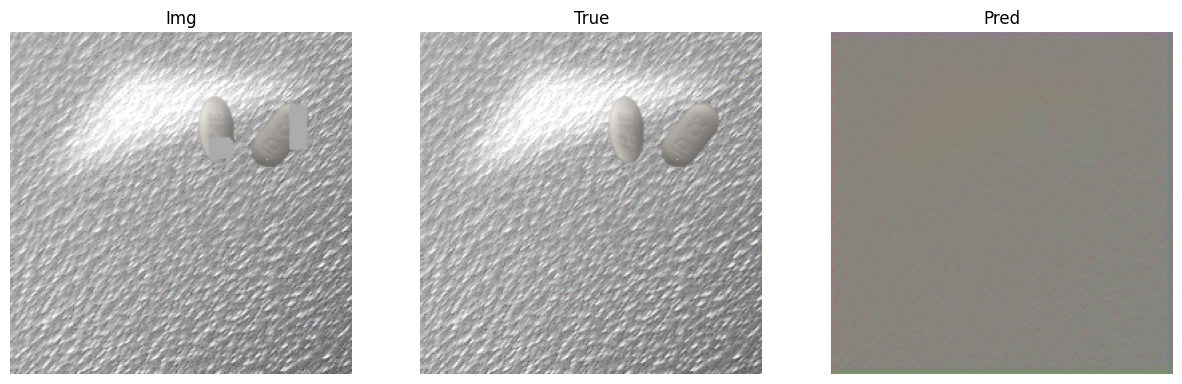

In [29]:
X, Y = generative_sequence[idx]
y_pred = model.predict(X)

idx += 1

views = []
for img, y_true, y_pred in zip(X, Y, y_pred):
  views.append([(img, f"Img"), (y_true, f"True"), (y_pred, f"Pred")])

visualize(views)